In [41]:
import minepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot, os, sys

from iminuit import Minuit


In [42]:
data_path = "../../Data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"
data_file = uproot.open(data_path)
data_tree = data_file['tree']

features = data_tree.keys(data_tree.keys()[:60])
features.remove(b"v0_ks_mass")

N_data = 1500
df = data_tree.pandas.df(features, entrystop = N_data)
mass = data_tree.pandas.df(b"v0_lb_mass", entrystop = N_data)

In [43]:
mics_mc = {}
pear_mc = {}

for col in df.columns:
    mine = minepy.MINE()
    mine.compute_score(mass.values.flatten(), df[col].values.flatten())
#     print(f"{col}: {mine.mic():.3f}")
    mics_mc[col] = mine.mic()
    pear_mc[col] = np.corrcoef(mass.values.flatten(), df[col].values.flatten())[0, 1]

In [74]:
{k: (v, pear_mc[k]) for k, v in sorted(mics_mc.items(), key=lambda item: item[1], reverse = True)[:]}

{'v0_lb_mass': (1.0000000000000007, 1.0),
 'thetastar': (0.7224409350263119, -0.7387120157620005),
 'alpha': (0.7175235020321901, 0.5050333837131618),
 'Alpha': (0.7175235020321901, 0.5050334423619146),
 'pL1': (0.5246865319094989, 0.7751480644019791),
 'v0_p1': (0.5227745134506463, 0.7751800484160628),
 'v0_qOverP1': (0.5227745134506463, -0.5484064445970495),
 'v0_la_mass': (0.415760031753441, -0.3798986030407201),
 'v0_pt1': (0.39746362258205054, 0.6621376814805059),
 'v0_pz1': (0.36928113098110193, 0.019690056773212478),
 'v0_lb_massErr': (0.354375724502469, 0.6839971486222037),
 'v0_ptErr': (0.33890772422362053, 0.626782389926985),
 'epsilon2': (0.3280607861079011, -0.3385838912408349),
 'pT': (0.300938550769621, 0.07512865014047945),
 'v0_px1': (0.2922346314369303, -0.033547218673180314),
 'v0_py1': (0.25491182957114167, 0.05479779713014855),
 'v0_p': (0.2403119501243483, 0.339364206691498),
 'numberOfSCTHits1': (0.20033257781965402, 0.23955376789076546),
 'v0_la_massErr': (0.2000

In [67]:
data_path = "../../Data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
data_file = uproot.open(data_path)
data_tree = data_file['tree']

features = data_tree.keys()[:60]
features.remove(b"v0_ks_mass")

N_data = 1500
df = data_tree.pandas.df(features, entrystop = N_data)
mass = data_tree.pandas.df(b"v0_lb_mass", entrystop = N_data)

In [68]:
features

[b'eventCounter',
 b'npv',
 b'ntrk_pv0',
 b'pv0_x',
 b'pv0_y',
 b'pv0_z',
 b'a0xy',
 b'a0',
 b'a0z',
 b'cosTheta',
 b'v0_chi2',
 b'v0_x',
 b'v0_y',
 b'v0_z',
 b'v0_rxy',
 b'v0_rxyErr',
 b'v0_px',
 b'v0_py',
 b'v0_pz',
 b'v0_pt',
 b'v0_p',
 b'v0_ptErr',
 b'v0_la_mass',
 b'v0_lb_mass',
 b'v0_ks_massErr',
 b'v0_la_massErr',
 b'v0_lb_massErr',
 b'v0_px1',
 b'v0_py1',
 b'v0_pz1',
 b'v0_pt1',
 b'v0_p1',
 b'v0_px2',
 b'v0_py2',
 b'v0_pz2',
 b'v0_pt2',
 b'v0_p2',
 b'v0_phi1',
 b'v0_theta1',
 b'v0_qOverP1',
 b'v0_phi2',
 b'v0_theta2',
 b'v0_qOverP2',
 b'alpha',
 b'calpha',
 b'epsilon1',
 b'epsilon2',
 b'Alpha',
 b'pL1',
 b'pL2',
 b'pT',
 b'thetastar',
 b'rapidity_ks',
 b'rapidity_la',
 b'rapidity_lb',
 b'pseudorapidity',
 b'numberOfPixelHits1',
 b'numberOfSCTHits1',
 b'numberOfTRTHits1']

In [69]:
from scipy.special import logit
logcos = df.cosTheta.apply(lambda x: logit((x + 1)/2))
mine = minepy.MINE()
mine.compute_score(mass.values.flatten(), logcos.values.flatten())
print(mine.mic())

0.12763997888359127


In [70]:
mics = {}
pear = {}

for col in df.columns:
    mine = minepy.MINE()
    mine.compute_score(mass.values.flatten(), df[col].values.flatten())
#     print(f"{col}: {mine.mic():.3f}")
    mics[col] = mine.mic()
    pear[col] = np.corrcoef(mass.values.flatten(), df[col].values.flatten())[0, 1]

In [73]:
{k: (v, pear[k]) for k, v in sorted(mics.items(), key=lambda item: item[1], reverse = True)[::-1]}

{'numberOfTRTHits1': (0.0, nan),
 'npv': (0.08518101277972848, -0.008009706527973254),
 'a0z': (0.10905987281123032, -0.013604449766461893),
 'a0': (0.10905987281123032, -0.013604449766461893),
 'pv0_y': (0.1094171896550262, -0.06364351074474851),
 'v0_phi2': (0.1122088724231652, 0.02624341390181137),
 'v0_chi2': (0.11564990437062683, 0.07029562444101749),
 'numberOfPixelHits1': (0.11584491929064211, -0.11403740449947052),
 'v0_x': (0.11675703391065997, 0.0031168011250534895),
 'v0_py': (0.11790363815734023, 0.028644847154695386),
 'rapidity_ks': (0.12270743725165824, 0.09032457699173246),
 'a0xy': (0.12408092817883823, 0.0458325460444642),
 'eventCounter': (0.12439002959653243, -0.03756268701564059),
 'v0_px': (0.1246871759260402, -0.02388739682808197),
 'v0_z': (0.12550751688061057, -0.03819397359261545),
 'pseudorapidity': (0.12619305839361275, 0.08158584419163299),
 'v0_rxy': (0.1262513368389334, 0.02910210732972933),
 'v0_y': (0.12630823141441566, -0.01964545108321607),
 'pv0_z': 

In [60]:
pass

In [49]:
features = "pT v0_ks_massErr alpha calpha v0_rxyErr cosTheta pL1 v0_rxy thetastar".split(" ")

In [50]:
Ndata = 10**6
test_ratio = 0.2

df = data_tree.pandas.df(features, entrystop = Ndata)

mass = data_tree.pandas.df("v0_ks_mass", entrystop = Ndata)

from sklearn.model_selection import train_test_split
df_train, df_test, mass_train, mass_test= train_test_split(df, mass, test_size = test_ratio)

In [51]:
mean, sig = 498.26, 7.005

from xgboost import XGBClassifier as LGBMClassifier

# Apply range
mass = mass_train[(mass_train > 400) & (mass_train < 600)].dropna()

pseudo_true = mass[abs(mass - mean) <  sig].dropna()

am = len(pseudo_true)

# True false
low_false = mass[(mass  + 7 * sig < mean)|(mass  + 10 * sig > mean)].dropna().sample(am)
high_false = mass[(mass  - 10 * sig > mean)|(mass  - 7 * sig < mean)].dropna().sample(am)

# Make df
indicies = pd.concat([pseudo_true, low_false, high_false]).index

target = pd.Series(np.zeros(len(indicies), dtype = int), indicies, dtype = bool)
target.loc[pseudo_true.index] = 1

model = LGBMClassifier()
model.fit(df_train.loc[target.index, :], target.astype(bool))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [52]:
import sys
sys.path.append("../py_files")
import functions as f
import importlib
from ExternalFunctions import nice_string_output, add_text_to_ax

importlib.reload(f)

<module 'functions' from '../py_files/functions.py'>

In [63]:
df.columns

Index(['eventCounter', 'npv', 'ntrk_pv0', 'pv0_x', 'pv0_y', 'pv0_z', 'a0xy',
       'a0', 'a0z', 'cosTheta',
       ...
       'numberOfSCTSharedHits2', 'numberOfSCTDeadSensors2',
       'numberOfSCTSpoiltHits2', 'numberOfTRTOutliers2', 'numberOfTRTHoles2',
       'numberOfTRTHighThresholdOutliers2', 'numberOfTRTDeadStraws2',
       'numberOfTRTTubeHits2', 'numberOfTRTXenonHits2',
       'numberOfTRTSharedHits2'],
      dtype='object', length=138)

ValueError: supplied range of [-8.142135620117188, inf] is not finite

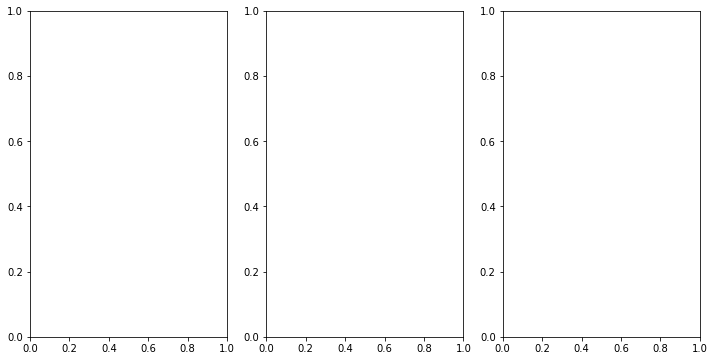

In [53]:
fig, ax = plt.subplots(ncols = 3, figsize = (12, 6))

probs = model.predict_proba(df_test)
from scipy.special import logit


auc_est = f.roc_curve_data(mass_test,  probs[:, 0], ax_roc = ax[0], ax_fits = ax[1], Npoints = 25, \
                 plimit = 0, verbose = False, ax_hist = ax[2])

# from sklearn.metrics import roc_curve, roc_auc_score
# x, y, _ = roc_curve(true1_test, probs1[:, 0])
# auc_true = roc_auc_score(true1_test, probs1[:, 0])

fig.suptitle(f"Model using: {', '.join(features)}", fontsize = 14)

# d = {"Estimated AUC:": 1 + auc_est, \
#      "True AUC:":      1 - auc_true}

# add_text_to_ax(0.4, 0.6, nice_string_output(d,extra_spacing = 3), ax = ax[0], fontsize = 9)

# ax[0].plot(y, x, '--')
ax[2].set_yscale('log')

ax[0].set(xlabel = "False Positive Rate", ylabel = "True Positve Rate")
ax[1].set(xlabel = "k-short mass", ylabel = "frequency")
ax[2].set(xlabel = "logit(probability)", ylabel = "frequency")

fig.tight_layout(rect = (0, 0, 1, 0.95))

# fig.savefig("../figures/corr_classifyer.pdf")

In [ ]:
label = model.predict(df_test)

In [ ]:
sig, bins = np.histogram(mass_test[label == True],  range = (400, 600), bins = 100)
bak, bins = np.histogram(mass_test[label == False], range = (400, 600), bins = 100)
tot, bins = np.histogram(mass_test, range = (400, 600), bins = 100)

xs = (bins[:-1] + bins[1:])/2

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (10, 4), sharey = True)

ax[0].fill_between(xs, tot, color = "gray")
ax[0].set_title("Total frequency")
ax[0].set_ylabel("Frequncy")


ax[1].fill_between(xs, sig, color = 'green')
ax[1].set_title("Classified signal")


ax[2].fill_between(xs, bak, color = 'red')
ax[2].set_title("Classified background")

for x in ax:
    x.set_xlabel("k-short-mass [MeV]")

fig.tight_layout()

# fig.savefig("../figures/bad_classifier.pdf")

In [ ]:
features_rm = [b'pT', b'v0_ks_massErr', b'alpha', b'calpha', b'pL1', b'thetastar', b'v0_la_mass', b'v0_lb_mass', b'v0_la_massErr', b'v0_lb_massErr', \
               b'Alpha', b'eventCounter']

In [ ]:
df

In [ ]:
data_path = "../../Data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
data_file = uproot.open(data_path)
data_tree = data_file['tree']

# features = data_tree.keys()[:67]



features = data_tree.keys()[:57]
features.remove(b"v0_ks_mass")

for rm in features_rm:
    features.remove(rm)

N_data = 1500
df = data_tree.pandas.df(features, entrystop = N_data)
mass = data_tree.pandas.df(b"v0_ks_mass", entrystop = N_data)

In [ ]:
Ndata = 2 * 10**6
test_ratio = 0.5

df = data_tree.pandas.df(features, entrystop = Ndata)

mass = data_tree.pandas.df("v0_ks_mass", entrystop = Ndata)

from sklearn.model_selection import train_test_split
df_train, df_test, mass_train, mass_test= train_test_split(df, mass, test_size = test_ratio)

In [ ]:
mean, sig = 498.26, 7.005

from xgboost import XGBClassifier as LGBMClassifier

# Apply range
mass = mass_train[(mass_train > 400) & (mass_train < 600)].dropna()

pseudo_true = mass[abs(mass - mean) <  sig].dropna()

am = len(pseudo_true)

# True false
low_false = mass[(mass  + 7 * sig < mean)|(mass  + 10 * sig > mean)].dropna().sample(am)
high_false = mass[(mass  - 10 * sig > mean)|(mass  - 7 * sig < mean)].dropna().sample(am)

# Make df
indicies = pd.concat([pseudo_true, low_false, high_false]).index

target = pd.Series(np.zeros(len(indicies), dtype = int), indicies, dtype = bool)
target.loc[pseudo_true.index] = 1

model = LGBMClassifier()
model.fit(df_train.loc[target.index, :], target.astype(bool))

In [ ]:
label = model.predict(df_test)

In [ ]:
sig, bins = np.histogram(mass_test[label == True],  range = (400, 600), bins = 100)
bak, bins = np.histogram(mass_test[label == False], range = (400, 600), bins = 100)
tot, bins = np.histogram(mass_test, range = (400, 600), bins = 100)

xs = (bins[:-1] + bins[1:])/2

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (10, 4), sharey = True)

ax[0].fill_between(xs, tot, color = "gray")
ax[0].set_title("Total frequency")
ax[0].set_ylabel("Frequncy")


ax[1].fill_between(xs, sig, color = 'green')
ax[1].set_title("Classified signal")


ax[2].fill_between(xs, bak, color = 'red')
ax[2].set_title("Classified background")

for x in ax:
    x.set_xlabel("k-short-mass [MeV]")

fig.tight_layout()

# fig.savefig("../figures/bad_classifier.pdf")

In [ ]:
import shap
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(df.iloc[:1000, :])

In [ ]:
shap.summary_plot(shap_values, df.iloc[:1000, :])

In [ ]:
shap.summary_plot(shap_values, df, plot_type="bar")

In [ ]:
df.columns